### Bellevue University
### DSC-540 Data Preparation
### Name: Tai Ngo
### Date: 4/19/2020

### Weeks 5 & 6 Exercises

### 1. Data Wrangling with Python: Activity 7, page 207

In [2]:
# Create a soup and load the data
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# read the page using bs4
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r")
soup = BeautifulSoup(fd)
fd.close()

In [4]:
# find the number of tables
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


In [5]:
# find the right table using the class attribute
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [6]:
# separate the source and the actual data
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [7]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [8]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [9]:
len(data_tables)

3

In [10]:
# check for the source names
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [11]:
# separate the header and the data for the first source
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [12]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [13]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [14]:
df1 = pd.DataFrame(data_rows1, columns=header1)

In [15]:
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [16]:
# repeat the same task for the second sources
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [17]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [18]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [19]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [20]:
df2 = pd.DataFrame(data_rows2, columns=header2)

In [21]:
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [22]:
# repeat the same task for the third source
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [23]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [24]:
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [25]:
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


### 2. Data Wrangling with Python: Activity 8, page 233

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv("visit_data.csv")

In [28]:
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [29]:
# check for duplicates
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


In [30]:
# check if essential columns contains NaN
# Notice that we have different ways to format boolean values for the % operator
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


In [33]:
# get rid of outliers
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

In [34]:
# report the size difference
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x11dbc0b50>,
 'caps': [<matplotlib.lines.Line2D at 0x11f1266d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11dbc0b10>],
 'medians': [<matplotlib.lines.Line2D at 0x11ff8bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11dbd2dd0>],
 'means': []}

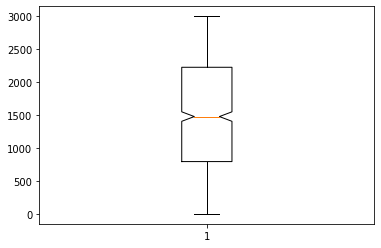

In [35]:
# create a box plot to check for outliers
plt.boxplot(df.visit, notch=True)

In [37]:
# get rid of any outliers
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Notice the powerful & operator
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


#### 3. Insert data into a SQL Lite database – create a table with the following data 

In [38]:
# import library
import sqlite3
'''
CREATE A TABLE 
(a VARCHAR(20), b VARCHAR(20),
 c VARCHAR(20), d VARCHAR(20),
 e INTEGER, f INTEGER'''

#### a. Name, Address, City, State, Zip, Phone Number

In [57]:
query = """
CREATE TABLE contacts (
name TEXT NOT NULL,
address TEXT NOT NULL,
city TEXT NOT NULL,
state TEXT NOT NULL,
zip TEXT NOT NULL,
phone TEXT NOT NULL UNIQUE
);
"""
con = sqlite3.connect(':memory:')
con.execute(query)
con.commit()

data = [('Tai', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0000'),
       ('Ta', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0001'),
       ('Ti', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0002'),
       ('ai', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0003'),
       ('Tac', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0004'),
       ('Tbi', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0005'),
       ('Tci', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0006'),
       ('Tdi', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0007'),
       ('Tei', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0008'),
       ('Tfi', '1600 Amphitheatre Pkwy', 'Mountain View', 'CA', '94043', '650-253-0009')]

stmt = "INSERT INTO contacts VALUES(?,?,?,?,?,?)"

con.executemany(stmt, data)
con.commit()

In [59]:
cursor = con.execute('select * from contacts')
rows = cursor.fetchall()
rows

[('Tai',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0000'),
 ('Ta',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0001'),
 ('Ti',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0002'),
 ('ai',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0003'),
 ('Tac',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0004'),
 ('Tbi',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0005'),
 ('Tci',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0006'),
 ('Tdi',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0007'),
 ('Tei',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0008'),
 ('Tfi',
  '1600 Amphitheatre Pkwy',
  'Mountain View',
  'CA',
  '94043',
  '650-253-0009')]

In [60]:
cursor.description

(('name', None, None, None, None, None, None),
 ('address', None, None, None, None, None, None),
 ('city', None, None, None, None, None, None),
 ('state', None, None, None, None, None, None),
 ('zip', None, None, None, None, None, None),
 ('phone', None, None, None, None, None, None))